# AluraVoz

In [ ]:
import pandas as pd

In [ ]:
uri = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'

In [ ]:
dados = pd.read_csv(uri)

In [ ]:
dados.sample(10)

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
175,0,Sim,Nao,34,Sim,Sim,Nao,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,Mensalmente,Nao,ChequeDigital,24.70,Nao
1117,0,Nao,Nao,52,Sim,Sim,FibraOptica,Nao,Nao,Sim,Nao,Nao,Sim,DoisAnos,Sim,CartaoDeCredito,89.45,Nao
9,0,Nao,Sim,62,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,UmAno,Nao,DebitoEmConta,56.15,Nao
3429,0,Sim,Sim,53,Sim,Nao,Nao,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,UmAno,Nao,DebitoEmConta,19.55,Nao
4200,0,Nao,Nao,65,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Sim,Sim,DoisAnos,Nao,CartaoDeCredito,59.95,Nao
6951,0,Nao,Nao,49,Sim,Nao,Nao,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,SemServicoDeInternet,DoisAnos,Sim,CartaoDeCredito,19.90,Nao
1850,1,Sim,Nao,47,Sim,Sim,DSL,Sim,Sim,Sim,Nao,Nao,Nao,Mensalmente,Sim,CartaoDeCredito,67.45,Nao
1731,1,Nao,Nao,1,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,69.60,Sim
1148,0,Nao,Nao,2,Sim,Sim,FibraOptica,Nao,Nao,Nao,Nao,Sim,Sim,Mensalmente,Sim,ChequeDigital,95.15,Sim
2236,1,Nao,Nao,5,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,71.45,Nao


In [ ]:
dados.shape

(7043, 18)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

In [ ]:
# transformação binária de forma manual
traducao_dic = {'Sim': 1, 'Nao' : 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [ ]:
# transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

# juncao dos dados transformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [ ]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
dados_final.shape

(7043, 39)

In [ ]:
# DICA: para mostrar todas as colunas sem os '...'
pd.set_option('display.max_columns', 39)

In [ ]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

Plotando o balanço dos dados 'Churn'

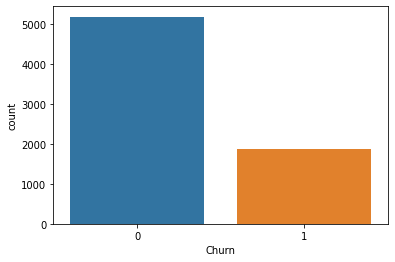

In [ ]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

Analisando o gráfico, podemos perceber que nossa variável está desbalanceada e precisamos tratar isso. Para realizar o balanceamento dos dados, utilizaremos uma técnica chamada de Oversampling, que consiste em realizar a criação de novas observações da classe quando há menos amostras, tendo como objetivo igualar a proporção entre as categorias.

Uma das técnicas de oversampling muito utilizada é a SMOTE. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras.

Vamos dar uma olhada no trecho de código utilizado para balancear o nosso dataset com o auxílio da biblioteca [imbalanced-learn](https://imbalanced-learn.org/stable/index.html) e da classe [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [ ]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Conjuge                                       7043 non-null   int64  
 1   Dependentes                                   7043 non-null   int64  
 2   TelefoneFixo                                  7043 non-null   int64  
 3   PagamentoOnline                               7043 non-null   int64  
 4   Churn                                         7043 non-null   int64  
 5   Maior65Anos                                   7043 non-null   int64  
 6   MesesDeContrato                               7043 non-null   int64  
 7   ContaMensal                                   7043 non-null   float64
 8   VariasLinhasTelefonicas_Nao                   7043 non-null   uint8  
 9   VariasLinhasTelefonicas_SemServicoTelefonico  7043 non-null   u

In [ ]:
smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE

X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [ ]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

In [ ]:
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


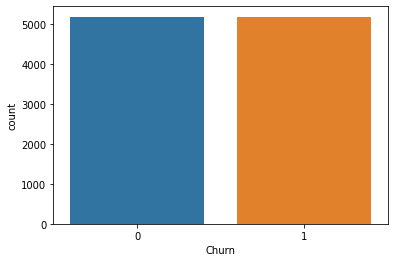

In [ ]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

Ao analisarmos a variável classificadora ‘Churn’, podemos notar que há menos clientes contendo Sim - 1 do que Não - 0. Para que o aprendizado do algoritmo não seja afetado pela falta de informações referentes ao Churn de clientes que nos deixaram (Sim), foi necessário aplicar uma técnica de balanceamento.

Nesta situação, foi preferível aplicar o Oversampling por causa das quantidades de informações de clientes que a base como um todo possui. Lembrando que, quanto mais dados para treino, melhor será o aprendizado da máquina. Após a aplicação da técnica SMOTE, houve a verificação se o balanceamento funcionou adequadamente .

## Modelo K-Nearest Neighbors (KNN)

### A matematica de KNN por trás dos panos

In [ ]:
Xmaria
# ymaria = ?

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [ ]:
# Divisão de inputs e outputs (features and labels)
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

Antes de calcularmos a distância algo muito importante de se fazer por se tratar de uma métrica de distância é deixar todos os valores na mesma escala. Vamos fazer isso utilizando a biblioteca do Scikit-lern, que você verá durante todo o projeto na implementação dos modelos.

In [ ]:
# bilbioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler

In [ ]:
norm = StandardScaler()

In [ ]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

In [ ]:
X_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

In [ ]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

Distancia Euclidiana:

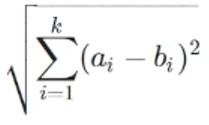

In [ ]:
import numpy as np

In [ ]:
a = Xmaria_normalizado

In [ ]:
b = X_normalizado[0]

In [ ]:
# 1. subtracao
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166355,  0.34940734,  2.01499307, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01637218,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03436608,  0.        ,
         2.05586858,  0.        , -2.09323857,  2.80145225,  0.        ,
        -2.07042701,  0.        ,  2.72884488]])

In [ ]:
# 2. exponenciação
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73585140e-03, 1.22085486e-01, 4.06019707e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06575675e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13864535e+00, 0.00000000e+00, 4.22659561e+00, 0.00000000e+00,
        4.38164773e+00, 7.84813473e+00, 0.00000000e+00, 4.28666801e+00,
        0.00000000e+00, 7.44659439e+00]])

In [ ]:
# 3. soma
soma = np.sum(np.square(a-b))
soma

91.70603225977928

In [ ]:
# 4. raiz
np.sqrt(soma)

9.576326657950807

Aqui está a distância da Maria com o cliente 0 da nossa base, é 9.576326657950807.

A partir de então o algoritmo vai calcular a distância da Maria com o cliente 1, 2, 3 e assim por diante, até o último cliente da nossa base de dados. Depois a partir do K, que você definirá, ele vai poder classificar a Maria como uma possível cliente a deixar ou não a Alura Voz. Vamos implementar esse modelo agora.

### Sobre as diferentes distâncias

Existem diversas outras medidas de distância que podem ser calculadas e cada uma delas impacta diretamente no resultado do modelo. As distâncias apresentadas aqui podem ser utilizadas no algoritmo KNN do scikit-learn, sendo a distância de Minkowski a medida de distância padrão ao instanciar o algoritmo, como pode ser checado na [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Podemos modificar a medida de distância utilizando o argumento metric da função sklearn.neighbors.KNeighborsClassifier. Com base nas medidas que foram apresentadas no texto, o parâmetro pode receber os seguintes valores:

* “euclidean” para a distância euclidiana;
* “manhattan” para a distância de Manhattan;
* “minkowski” para a distância de Minkowski;
* “chebyshev” para a distância de Chebyshev.



Caso tenha interesse em descobrir o funcionamento ou outras medidas de distância que podem ser utilizadas, confira a documentação do [sklearn.metrics.DistanceMetric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric).



# K-Nearest Neighbors (KNN)

## Treino-teste:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, 
                                                        y, 
                                                        test_size=0.3, 
                                                        random_state=123)

## Implementando o modelo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(metric='euclidean')

In [ ]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [ ]:
predito_knn = knn.predict(X_teste)

In [ ]:
# predizendo a variavel 'Churn' com KNN
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

# Bernoulli Naive Bayes


Treino e teste continuam valendo.

In [ ]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215]])

In [ ]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

## Imprementando modelo Bernoulli Naive Bayes (BNB)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

Agora temos uma questão a resolver: o conjunto de dados que estamos trabalhando não contém somente variáveis binárias, porém a maior parte, incluindo a nossa variável classificadora, como você pode ver aqui no Y de treino, é binária, contém apenas dois valores possíveis.

Algo muito interessante nesse modelo é que há um parâmetro chamado binarize, onde valores abaixo do parâmetro definido serão 0 e os acima serão 1.

Eu optei, pensando em todas as probabilidades estatísticas, em utilizar a mediana, mas você pode utilizar diversas formas, a média dos seus dados, diversas formas estatísticas de se obter um valor central, de obter um valor ideal para dividir os nossos dados e definir como o parametro binarize.

In [ ]:
np.median(X_treino)

-0.4461759755508453

Escolhido este valor, podemos construir o modelo:

In [ ]:
bnb = BernoulliNB(binarize=(np.median(X_treino)))

In [ ]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.4461759755508453)

In [ ]:
predito_BNb = bnb.predict(X_teste)

In [ ]:
# predizendo a variavel 'Churn' com BNb
predito_BNb

array([1, 0, 0, ..., 1, 1, 1])

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# verificando a importancia de cada atributo: mais proximo de zero, mais pura é a variavel:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [ ]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [ ]:
# predizendo a variavel 'Churn' com dtc
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

# Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

## KNN

In [ ]:
print(confusion_matrix(y_teste, predito_knn))

[[1241  328]
 [ 247 1289]]


### Plot KNN matriz de confusão:

[Text(56.5, 0.5, 'Real'),
 Text(0.5, 38.5, 'Predição'),
 Text(0.5, 1.0, 'Matriz de confusão KNN')]

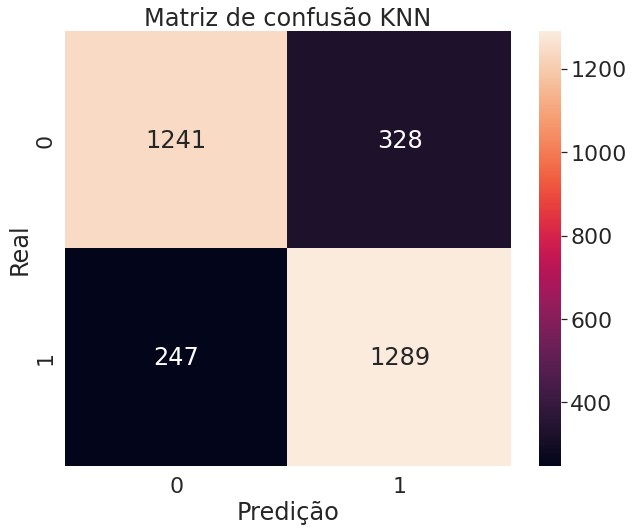

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

matriz_confusao = confusion_matrix(y_teste, predito_knn)

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real", title='Matriz de confusão KNN')

## BNB

In [ ]:
print(confusion_matrix(y_teste, predito_BNb))

[[1048  521]
 [ 242 1294]]


### Plot BNB matriz de confusão:

[Text(56.5, 0.5, 'Real'),
 Text(0.5, 38.5, 'Predição'),
 Text(0.5, 1.0, 'Matriz de confusão BNB')]

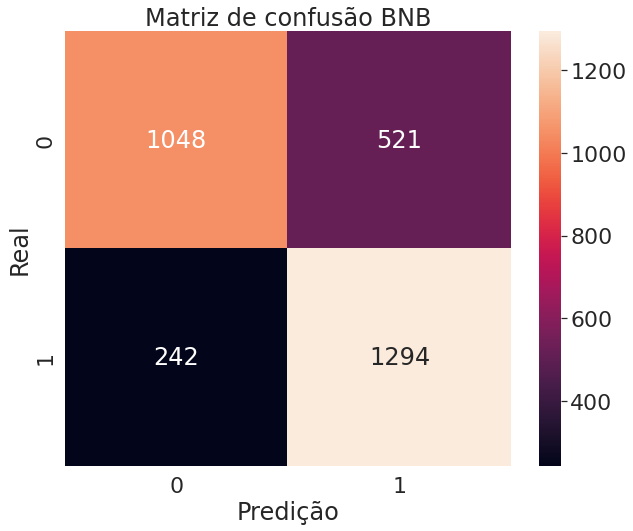

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

matriz_confusao = confusion_matrix(y_teste, predito_BNb)

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real", title='Matriz de confusão BNB')

## DTC

In [ ]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1249  320]
 [ 277 1259]]


### Plot DTC matriz de confusão:

[Text(56.5, 0.5, 'Real'),
 Text(0.5, 38.5, 'Predição'),
 Text(0.5, 1.0, 'Matriz de confusão DTC')]

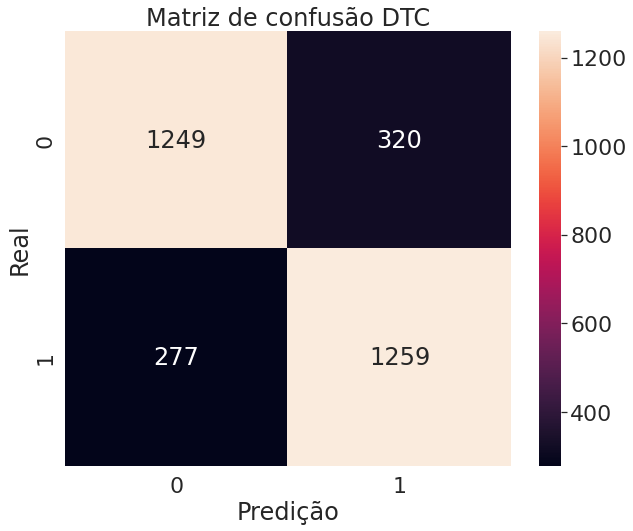

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

matriz_confusao = confusion_matrix(y_teste, predito_ArvoreDecisao)

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
ax = sns.heatmap(matriz_confusao, annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real", title='Matriz de confusão DTC')

# Tipos de métricas: Acurácia

Temos a seguinte conta: a acurácia vai ser igual aos verdadeiros positivos mais os verdadeiros negativos. Você lembra da matriz de confusão? São os valores realmente corretos, os verdadeiros sins e os verdadeiros nãos. Dividido por todos os resultados, os verdadeiros positivos mais os falsos positivos, mais os verdadeiros negativos mais os falsos negativos, resultando no total de valores inferidos de forma correta, classificados previstos de forma correta, "ACC = TP + TN/TP + FP + TN + FN".

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
knn_acc = accuracy_score(y_teste, predito_knn)
bnb_acc = accuracy_score(y_teste, predito_BNb)
dtc_acc = accuracy_score(y_teste, predito_ArvoreDecisao)

In [ ]:
print(f'Acurácia KNN: {knn_acc * 100 :.2f}%')
print(f'Acurácia BNB: {bnb_acc * 100 :.2f}%')
print(f'Acurácia DTC: {dtc_acc * 100 :.2f}%')

Acurácia KNN: 81.48%
Acurácia BNB: 75.43%
Acurácia DTC: 80.77%


# Tipos de métricas: precisão

A Precisão calcula quantos verdadeiros positivos foram classificados de forma correta. Como se calcula isso?

Sabemos que os verdadeiros positivos são aqueles que foram realmente preditos como verdadeiro sim, a precisão é calculada da seguinte forma: o total de verdadeiros positivos dividido pelos verdadeiros positivos mais os falsos positivos, "PS = TP/TP + FP".

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
knn_precision = precision_score(y_teste, predito_knn)
bnb_precision = precision_score(y_teste, predito_BNb)
dtc_precision = precision_score(y_teste, predito_ArvoreDecisao)

In [ ]:
print(f'Precisão KNN: {knn_precision * 100 :.2f}%')
print(f'Precisão BNB: {bnb_precision * 100 :.2f}%')
print(f'Precisão DTC: {dtc_precision * 100 :.2f}%')

Precisão KNN: 79.72%
Precisão BNB: 71.29%
Precisão DTC: 79.73%


# Tipos de métricas: recall

A última métrica que eu apresento a você é o recall. O recall também é conhecido como revocação ou sensibilidade. Preste muita atenção, o recall muitas vezes é confundido com a precisão, porque ele vai medir quão bom o nosso modelo está em classificar os resultados realmente positivos.

Vamos ver a fórmula do recall. Verdadeiros positivos, que são aqueles que foram classificados como sim pelo nosso modelo e que são realmente sim, divididos pelos verdadeiros positivos mais os falsos negativos, "RC = TP/TP + FN". 

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
knn_recall = recall_score(y_teste, predito_knn)
bnb_recall = recall_score(y_teste, predito_BNb)
dtc_recall = recall_score(y_teste, predito_ArvoreDecisao)

In [ ]:
print(f'Recall KNN: {knn_recall * 100 :.2f}%')
print(f'Recall BNB: {bnb_recall * 100 :.2f}%')
print(f'Recall DTC: {dtc_recall * 100 :.2f}%')

Recall KNN: 83.92%
Recall BNB: 84.24%
Recall DTC: 81.97%


# Tipos de métricas: F1 score

Além da acurácia, precisão e recall, podemos extrair da matriz de confusão uma outra métrica conhecida como f1 score, que é uma média harmônica entre o recall e a precisão.O recall e a precisão são grandezas inversamente proporcionais, ou seja, à medida que vai aumentando o recall, por consequência irá diminuir a precisão e vice-versa.

O f1 score é uma métrica para identificar se algum dos valores de recall ou precisão estão baixos, uma vez que não é muito interessante ter um modelo com um alto recall e pouca precisão, ou vice versa. Então, caso sua intenção seja obter um valor equilibrado entre o recall e a precisão, a métrica que precisamos maximizar é o f1 score.

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
knn_f1 = f1_score(y_teste, predito_knn)
bnb_f1 = f1_score(y_teste, predito_BNb)
dtc_f1 = f1_score(y_teste, predito_ArvoreDecisao)

In [ ]:
print(f'F1 KNN: {knn_f1 * 100 :.2f}%')
print(f'F1 BNB: {bnb_f1 * 100 :.2f}%')
print(f'F1 DTC: {dtc_f1 * 100 :.2f}%')

F1 KNN: 81.76%
F1 BNB: 77.23%
F1 DTC: 80.83%


# Escolhendo o melhor modelo

E agora, qual o modelo que nós escolheremos para apresentar para a equipe de vendas? Qual o modelo classifica melhor nossos clientes?

Eu escolhi utilizar a precisão. A precisão vai medir quantos valores positivos foram previstos de forma correta com um todo no nosso modelo. Lembrando que os verdadeiros positivos são os sins, é aquele Churn igual a sim. É aquele Churn que precisamos dar atenção, é o Churn que temos que reduzir, são as pessoas que estão deixando a nossa empresa, estamos deixando de lucrar, a Alura Voz está perdendo com esses clientes saindo.

Com isso concluímos que para escolher a melhor métrica para aplicar ao nosso modelo, para obter o melhor resultado, até para apresentar em seus relatórios, nas suas entregas, depende do dado que você está trabalhando, depende do problema que você quer solucionar.

[01:38] Por isso, muita atenção. Entenda bem o seu problema, entenda bem a solução que você tem que correr atrás porque é a partir daí que você vai saber mudar todo o seu processo de modelagem, criação e validação de resultados.

### Predizendo o churn de maria:

In [ ]:
predito_ArvoreDecisao = dtc.predict(Xmaria)
predito_ArvoreDecisao

array([1])

In [ ]:
predito_BNb = bnb.predict(Xmaria)
predito_BNb

array([0])

In [ ]:
predito_knn = knn.predict(Xmaria)
predito_knn

array([1])